In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout,GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [2]:
#Load in the data
cifar10 = tf.keras.datasets.cifar10
(x_train,y_train) , (x_test,y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/250.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print('x_train.shape', x_train.shape)
print('y_train.shape', y_train.shape)

170500096/170498071 [==============================] - 6s 0us/step
x_train.shape (50000, 32, 32, 3)
y_train.shape (50000,)


In [3]:
x_train[0][0][0].shape

(3,)

In [4]:
x_train[0][0][0]

array([0.23137255, 0.24313725, 0.24705882])

In [5]:
#number of classes
K = len(set(y_train))
print('number of classes:', K)

number of classes: 10


In [0]:
#Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32,(3,3), strides=2, activation='relu') (i)
x = Conv2D(64,(3,3), strides =2, activation='relu') (x)
x = Conv2D(128, (3,3), strides =2, activation='relu') (x)
x = Flatten() (x)
x= Dropout(0.2)(x)
x = Dense(1024, activation ='relu')(x)
x=Dropout(0.2) (x)
x = Dense(K, activation ='softmax') (x)

model = Model(i,x)

In [8]:
#Compile and fit
#Note: make sure you are using GPU for this
model.compile(optimizer ='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=50)

Epoch 1/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5882 - accuracy: 0.4185 - val_loss: 1.2955 - val_accuracy: 0.5332
Epoch 2/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3032 - accuracy: 0.5286 - val_loss: 1.2426 - val_accuracy: 0.5634
Epoch 3/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1654 - accuracy: 0.5822 - val_loss: 1.0500 - val_accuracy: 0.6276
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0778 - accuracy: 0.6156 - val_loss: 1.0014 - val_accuracy: 0.6516
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0052 - accuracy: 0.6391 - val_loss: 0.9238 - val_accuracy: 0.6789
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9514 - accuracy: 0.6614 - val_loss: 0.9389 - val_accuracy: 0.6665
Epoch 7/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8943 - accuracy: 0.6799 - val_loss: 0.8983 - val_accuracy:

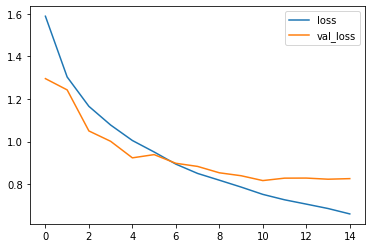

In [10]:
#Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

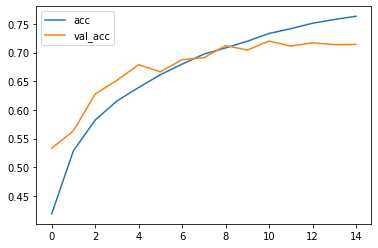

In [12]:
#Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[777  19  39   5  12  10  13  16  84  25]
 [ 10 849   5   5   3   2   9   2  43  72]
 [ 76  12 525  80  93  81  75  28  17  13]
 [ 20   7  53 479  62 235  76  32  17  19]
 [ 23   2  47  68 661  46  80  55  12   6]
 [ 16   6  22 166  47 643  42  42  10   6]
 [  9  10  28  52  28  19 833   5  12   4]
 [ 15   2  23  43  63  60  18 750   9  17]
 [ 59  30  10  10   4  10   4   3 854  16]
 [ 36  98   5   9   6   9  12   8  45 772]]


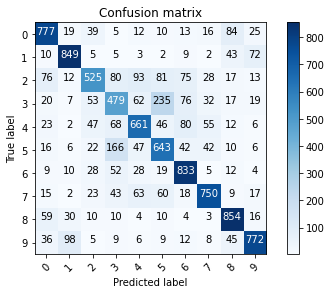

In [13]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


In [0]:
#label mapping
labels='''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

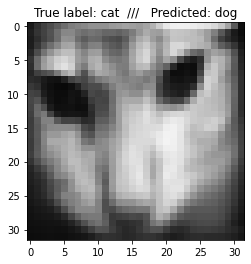

In [26]:
#SHow me misclassified examples
# TODO: add label names
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title('True label: %s  ///   Predicted: %s' % (labels[y_test[i]], labels[p_test[i]]));